In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

print(tf.__version__)

1.14.0


In [2]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)


In [3]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [4]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


排序后的单词——数字索引

In [7]:
sorted(word_index.items(),key=lambda x:x[1])

[('<PAD>', 0),
 ('<START>', 1),
 ('<UNK>', 2),
 ('<UNUSED>', 3),
 ('the', 4),
 ('and', 5),
 ('a', 6),
 ('of', 7),
 ('to', 8),
 ('is', 9),
 ('br', 10),
 ('in', 11),
 ('it', 12),
 ('i', 13),
 ('this', 14),
 ('that', 15),
 ('was', 16),
 ('as', 17),
 ('for', 18),
 ('with', 19),
 ('movie', 20),
 ('but', 21),
 ('film', 22),
 ('on', 23),
 ('not', 24),
 ('you', 25),
 ('are', 26),
 ('his', 27),
 ('have', 28),
 ('he', 29),
 ('be', 30),
 ('one', 31),
 ('all', 32),
 ('at', 33),
 ('by', 34),
 ('an', 35),
 ('they', 36),
 ('who', 37),
 ('so', 38),
 ('from', 39),
 ('like', 40),
 ('her', 41),
 ('or', 42),
 ('just', 43),
 ('about', 44),
 ("it's", 45),
 ('out', 46),
 ('has', 47),
 ('if', 48),
 ('some', 49),
 ('there', 50),
 ('what', 51),
 ('good', 52),
 ('more', 53),
 ('when', 54),
 ('very', 55),
 ('up', 56),
 ('no', 57),
 ('time', 58),
 ('she', 59),
 ('even', 60),
 ('my', 61),
 ('would', 62),
 ('which', 63),
 ('only', 64),
 ('story', 65),
 ('really', 66),
 ('see', 67),
 ('their', 68),
 ('had', 69),
 ('c

第一个训练数据代表文本

In [8]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh


准备数据
 
影评（整数数组）必须转换为张量，然后才能馈送到神经网络中。我们可以通过以下两种方法实现这种转换：

•对数组进行独热编码，将它们转换为由 0 和 1 构成的向量。例如，序列 [3, 5] 将变成一个 10000 维的向量，除索引 3 和 5 转换为 1 之外，其余全转换为 0。然后，将它作为网络的第一层，一个可以处理浮点向量数据的密集层。不过，这种方法会占用大量内存，需要一个大小为 num_words * num_reviews 的矩阵。


•或者，我们可以填充数组，使它们都具有相同的长度，然后创建一个形状为 max_length * num_reviews 的整数张量。我们可以使用一个能够处理这种形状的嵌入层作为网络中的第一层。

我们将使用第二种方法。

由于影评的长度必须相同，我们将使用 pad_sequences 函数将长度标准化：


In [9]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)


In [10]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [11]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

构建模型

In [12]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

W0806 17:52:52.136748  6100 deprecation.py:506] From E:\Anaconda3\lib\site-packages\tensorflow\python\keras\initializers.py:119: calling RandomUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0806 17:52:52.199751  6100 deprecation.py:506] From E:\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


按顺序堆叠各个层以构建分类器：

1.第一层是 Embedding 层。该层会在整数编码的词汇表中查找每个字词-索引的嵌入向量。模型在接受训练时会学习这些向量。这些向量会向输出数组添加一个维度。生成的维度为：(batch, sequence, embedding)。

2.接下来，一个 GlobalAveragePooling1D 层通过对序列维度求平均值，针对每个样本返回一个长度固定的输出向量。这样，模型便能够以尽可能简单的方式处理各种长度的输入。

3.该长度固定的输出向量会传入一个全连接 (Dense) 层（包含 16 个隐藏单元）。

4.最后一层与单个输出节点密集连接。应用 sigmoid 激活函数后，结果是介于 0 到 1 之间的浮点值，表示概率或置信水平。


In [13]:
model.compile(optimizer=tf.train.AdamOptimizer(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0806 17:52:55.036913  6100 deprecation.py:323] From E:\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [14]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [15]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 122us/sample - loss: 0.6920 - acc: 0.5899 - val_loss: 0.6904 - val_acc: 0.6857
Epoch 2/40
15000/15000 [==============================] - 1s 98us/sample - loss: 0.6876 - acc: 0.7164 - val_loss: 0.6843 - val_acc: 0.7336
Epoch 3/40
15000/15000 [==============================] - 2s 102us/sample - loss: 0.6777 - acc: 0.7470 - val_loss: 0.6715 - val_acc: 0.7309
Epoch 4/40
15000/15000 [==============================] - 2s 114us/sample - loss: 0.6594 - acc: 0.7569 - val_loss: 0.6501 - val_acc: 0.7345
Epoch 5/40
15000/15000 [==============================] - 2s 105us/sample - loss: 0.6313 - acc: 0.7829 - val_loss: 0.6200 - val_acc: 0.7671
Epoch 6/40
15000/15000 [==============================] - 2s 118us/sample - loss: 0.5943 - acc: 0.8044 - val_loss: 0.5833 - val_acc: 0.8000
Epoch 7/40
15000/15000 [==============================] - 2s 100us/sample - loss: 0.5498 - acc: 0.8243 - val_lo

In [16]:
results = model.evaluate(test_data, test_labels)

print(results)

25000/25000 [==============================] - 1s 45us/sample - loss: 0.3269 - acc: 0.8730
[0.32690746581554414, 0.87296]


In [17]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

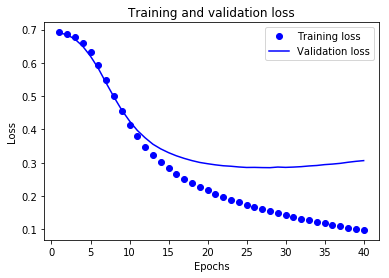

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


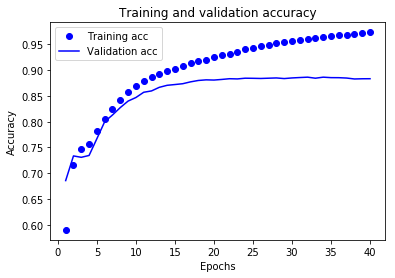

In [20]:

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

模型在20轮以后开始过拟合